<a href="https://colab.research.google.com/github/SeunghyeChae/tmdhey/blob/main/deeplearning_basic_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST 딥러닝

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import Dense,Input,Flatten
from tensorflow.keras.utils import to_categorical, plot_model

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')


In [2]:
tf.random.set_seed(111)

(x_train_full, y_train_full),(x_test, y_test)= load_data(path='mnist.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=111)


11501568/11490434 [==============================] - 0s 0us/step


In [3]:
num_x_train= (x_train.shape[0])
num_x_val= (x_val.shape[0])
num_x_test= (x_test.shape[0])

print('학습 데이터: {}\t레이블: {}'.format(x_train_full.shape, y_train_full.shape))
print('학습 데이터: {}\t레이블: {}'.format(x_train.shape, y_train.shape))
print('학습 데이터: {}\t레이블: {}'.format(x_val.shape, y_val.shape))
print('학습 데이터: {}\t레이블: {}'.format(x_test.shape, y_test.shape))


학습 데이터: (60000, 28, 28)	레이블: (60000,)
학습 데이터: (42000, 28, 28)	레이블: (42000,)
학습 데이터: (18000, 28, 28)	레이블: (18000,)
학습 데이터: (10000, 28, 28)	레이블: (10000,)


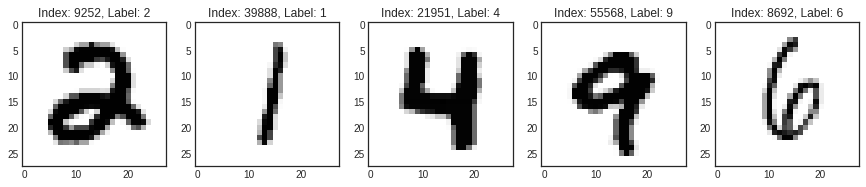

In [4]:
num_sample= 5
random_idxs= np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15,3))
for i,idx in enumerate(random_idxs):
  img= x_train_full[idx,:]
  label= y_train_full[idx]

  plt.subplot(1, len(random_idxs),i+1)
  plt.imshow(img)
  plt.title('Index: {}, Label: {}'.format(idx,label))

In [5]:
# normalization
x_train = x_train/255.      # 0~255값을 가지는 것을 0~1로 normalization
x_val= x_val/255.
x_test= x_test/255.

y_train= to_categorical(y_train)  # 정답 0~9를 categorical로 변환
y_val= to_categorical(y_val)
y_test= to_categorical(y_test)

# 모델 구성(Sequential)

In [6]:
# list로 넣는게 간단함 / mnist는 (2)8,28) 이미지임 
model= Sequential([Input(shape=(28,28),name='input'),
                  Flatten(input_shape=[28,28], name='flatten'),
                  Dense(100, activation='relu', name='dense1'),
                  Dense(64, activation='relu', name='dense2'),
                  Dense(32, activation='relu', name='dense3'),
                  Dense(10, activation='softmax', name='output')]) 

model.summary()

# Flatten : 28*28 = 784  >> Dense layer로 100>64>32>10으로 신경망구성해서 줄임

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 100)               78500     
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


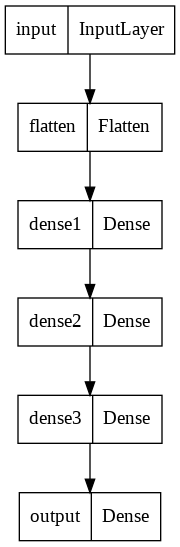

In [7]:
plot_model(model)

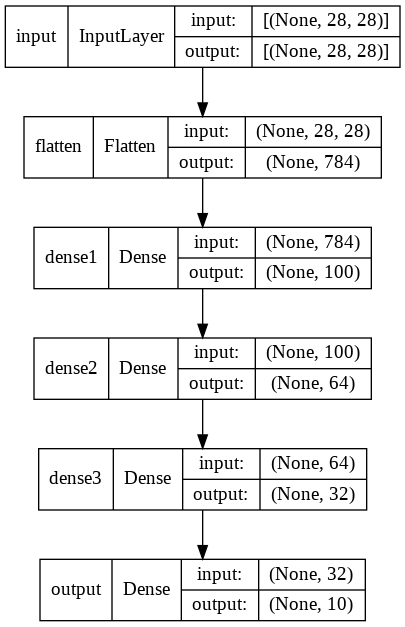

In [8]:
plot_model(model, show_shapes=True)

# model compile & training

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['acc'])

In [10]:
history= model.fit(x_train,y_train,
                   epochs=50,
                   batch_size=128,
                   validation_data=(x_val,y_val))

Epoch 1/50
329/329 [==============================] - 4s 6ms/step - loss: 1.6822 - acc: 0.5096 - val_loss: 0.9621 - val_acc: 0.7749
Epoch 2/50
329/329 [==============================] - 2s 5ms/step - loss: 0.6800 - acc: 0.8292 - val_loss: 0.5311 - val_acc: 0.8517
Epoch 3/50
329/329 [==============================] - 2s 6ms/step - loss: 0.4660 - acc: 0.8714 - val_loss: 0.4191 - val_acc: 0.8792
Epoch 4/50
329/329 [==============================] - 2s 6ms/step - loss: 0.3920 - acc: 0.8899 - val_loss: 0.3733 - val_acc: 0.8909
Epoch 5/50
329/329 [==============================] - 2s 6ms/step - loss: 0.3500 - acc: 0.9004 - val_loss: 0.3319 - val_acc: 0.9044
Epoch 6/50
329/329 [==============================] - 1s 4ms/step - loss: 0.3205 - acc: 0.9089 - val_loss: 0.3188 - val_acc: 0.9062
Epoch 7/50
329/329 [==============================] - 1s 4ms/step - loss: 0.2977 - acc: 0.9150 - val_loss: 0.3171 - val_acc: 0.9060
Epoch 8/50
329/329 [==============================] - 1s 5ms/step - loss: 0.

In [11]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

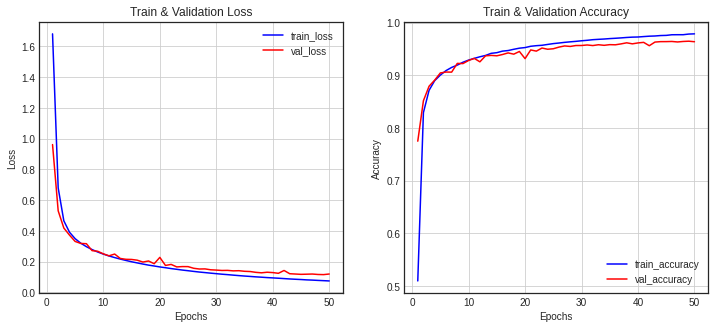

In [15]:
history_dict= history.history
# ------------------------------------------------------
loss= history_dict['loss']
val_loss= history_dict['val_loss']

epochs= range(1,len(loss)+1)
fig= plt.figure(figsize=(12,5))

ax1= fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train & Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

# ------------------------------------------------------
accuracy= history_dict['acc']
val_accuracy= history_dict['val_acc']

ax2= fig.add_subplot(1,2,2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train & Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()
